### Урок 3. Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

#### Задача 1
Даны значения зарплат из выборки выпускников: 

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.
Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [52]:
# Cреднее арифметическое

array = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]
mean = sum(array) / len(array)
mean

65.3

In [53]:
# Проверка

import numpy as np
mean == np.mean(array)

True

In [54]:
# среднее квадратичное отклонение
std = (sum([(i - mean) ** 2 for i in array]) / len(array)) ** 0.5
std

30.823854398825596

In [55]:
# Проверка
std == np.std(array)

True

In [56]:
# Смещенная оценка дисперсий
variance = std ** 2
variance

950.11

In [57]:
# Проверка
variance = np.var(array, ddof=0)

In [58]:
# Несмещенная оценка дисперсий
variance2 = sum([(i - mean) ** 2 for i in array]) / (len(array) - 1)
variance2

1000.1157894736842

In [59]:
# Проверка
variance2 = np.var(array, ddof=1)

#### Задача 2
Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [60]:
q1, q3 = np.quantile(array, [0.25, 0.75])

In [61]:
# Первый квартиль
q1

42.0

In [62]:
# Третий квартиль
q3

81.0

In [63]:
# интерквартильное расстояние
inter_q = q3 - q1
inter_q

39.0

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd7afb4d040>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd7afb4d8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd7afb4cbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd7afb4f760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd7afb4f2b0>],
 'means': []}

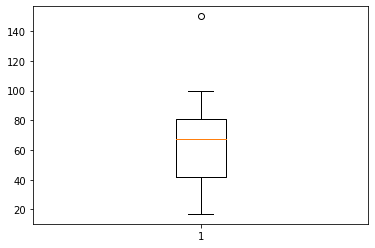

In [64]:
import matplotlib.pyplot as plot

plot.boxplot(array)

In [65]:
# На график явно виден 1 выброс выше 140

In [66]:
# Проверка выбросов
boxplot_range = (q1 - 1.5 * inter_q, q3 + 1.5 * inter_q)
boxplot_range

(-16.5, 139.5)

In [67]:
# Выбросы
outliers = [x for x in array if x < boxplot_range[0] or x > boxplot_range[1]]
outliers

[150]

In [68]:
# Доля выбросов
len(outliers) / len(array)

0.05

#### Задача 3
В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?
Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Пусть n - количество студентов на факультете A

A = B = 0.5 * C = n

Всего студентов: 4n

P(X|A) = 0.8

P(X|B) = 0.7

P(X|C) = 0.9

P(X) = 0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9 = 0.825

In [69]:
pX = 0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9
pX

0.825

Какова вероятность, что он учится

a) на факультете A

P(A) = 0.25

P(A|X) = P(X|A) * P(A) / P(X) = 0.8 * 0.25 / pX = 0.24242424242424246

In [70]:
0.8 * 0.25 / pX

0.24242424242424246

б) на факультете B

P(B) = 0.25

P(B|X) = P(X|B) * P(B) / P(X) = 0.7 * 0.25 / pX = 0.21212121212121213

In [74]:
0.7 * 0.25 / pX

0.21212121212121213

в) на факультете C

P(C) = 0.5

P(C|X) = P(X|C) * P(C) / P(X) = 0.9 * 0.5 / pX = 0.5454545454545455

In [72]:
0.9 * 0.5 / pX

0.5454545454545455